# Problem Statement

---

Kementerian pertanian menghadapi tantangan dalam mengoptimalkan hasil panen jagung. Untuk tetap dapat bersaing di pasar dan memastikan produksi yang berkelanjutan, perlu pengambilan keputusan yang memaksimalkan hasil panen dan meningkatkan efisiensi operasional.

# Objective

---

Mengidentifikasi kombinasi optimal dari sumber daya yang bertujuan memaksimalkan hasil panen.

# Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/GSB/corn_data.csv")
df.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


# Data Understanding

In [ ]:
df.shape

(422, 22)

Terdapat 422 rows dan 22 columns pada dataset

In [ ]:
df.describe(include='all')

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
count,422,422,396,422,422,422.000000,422,351.000000,422.000000,422.000000,...,422,422,422,422,422,422,422,422,422.000000,422.000000
unique,1,422,5,2,5,NaN,1,NaN,NaN,NaN,...,1,3,1,2,5,4,2,3,NaN,NaN
top,TAITA TAVETA,fmr_65,Primary,Female,36-45,NaN,corn,NaN,NaN,NaN,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,NaN,NaN
freq,422,1,238,299,132,NaN,422,NaN,NaN,NaN,...,422,321,422,303,188,245,286,321,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.263033,NaN,0.828063,65.189573,2.843602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.417583,38.404455
std,NaN,NaN,NaN,NaN,NaN,1.706355,NaN,0.584884,65.754796,0.974348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079007,0.094324
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.250000,20.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.640000,38.270000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.500000,25.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.490000,38.340000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,0.500000,50.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.410000,38.370000
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.000000,75.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.360000,38.400000


In [ ]:
df.describe(include='object')

,County,Farmer,Education,Gender,Age bracket,Crop,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
count,422,422,396,422,422,422,422,422,422,422,422,422,422,422,422
unique,1,422,5,2,5,1,1,1,3,1,2,5,4,2,3
top,TAITA TAVETA,fmr_65,Primary,Female,36-45,corn,Manual,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili
freq,422,1,238,299,132,422,422,422,321,422,303,188,245,286,321


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             396 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               351 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

In [ ]:
# Cek missing value
df.isna().sum()

County                   0
Farmer                   0
Education               26
Gender                   0
Age bracket              0
Household size           0
Crop                     0
Acreage                 71
Fertilizer amount        0
Laborers                 0
Yield                    0
Power source             0
Water source             0
Main credit source       0
Crop insurance           0
Farm records             0
Main advisory source     0
Extension provider       0
Advisory format          0
Advisory language        0
Latitude                 0
Longitude                0
dtype: int64

Terdapat missing data pada Education sebanyak 26 dan Acreage sebanyak 71

In [ ]:
# Cek proposi missing value
(df.isna().sum() / df.shape[0])*100

County                   0.000000
Farmer                   0.000000
Education                6.161137
Gender                   0.000000
Age bracket              0.000000
Household size           0.000000
Crop                     0.000000
Acreage                 16.824645
Fertilizer amount        0.000000
Laborers                 0.000000
Yield                    0.000000
Power source             0.000000
Water source             0.000000
Main credit source       0.000000
Crop insurance           0.000000
Farm records             0.000000
Main advisory source     0.000000
Extension provider       0.000000
Advisory format          0.000000
Advisory language        0.000000
Latitude                 0.000000
Longitude                0.000000
dtype: float64

data missing pada Acreage melibihi 10 %

In [ ]:
# Cek data duplikat
df.duplicated().any()

False

Tidak terdapat data duplikat.

# Data Cleaning

In [ ]:
# Input missing value pada Acreage
df['Acreage'] = df['Acreage'].fillna(df['Acreage'].mean())

In [ ]:
df = df.dropna()

In [ ]:
df.nunique()

County                    1
Farmer                  396
Education                 5
Gender                    2
Age bracket               5
Household size            9
Crop                      1
Acreage                  11
Fertilizer amount        32
Laborers                  6
Yield                    34
Power source              1
Water source              1
Main credit source        3
Crop insurance            1
Farm records              2
Main advisory source      5
Extension provider        4
Advisory format           2
Advisory language         3
Latitude                 36
Longitude                25
dtype: int64

In [ ]:
columns = df.columns.values
columns_to_delete = ['Farmer', 'County', 'Crop', 'Power source', 'Water source',
                     'Crop insurance', 'Latitude', 'Longitude']
columns_to_delete = [col for col in columns_to_delete if col in columns]
df.drop(columns=columns_to_delete,axis=1, inplace=True)
df

<ipython-input-95-f00caa0a25c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_delete,axis=1, inplace=True)


,Education,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
0,Certificate,Male,36-45,7,2.000000,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.250000,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.000000,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.500000,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,0.828063,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Secondary,Female,56-65,3,0.828063,40,2,70,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
392,Secondary,Female,46-55,4,0.828063,31,3,50,Credit groups,No,Radio,Private Provider,Phone Calls,English
393,Secondary,Female,56-65,5,0.500000,31,2,50,Credit groups,Yes,Television,County Government,Phone Calls,Kiswahili
394,Secondary,Male,56-65,4,0.500000,50,3,50,Credit groups,Yes,Extension services,County Government,SMS text,Kiswahili


County, Crop, Power Source, Water Source, dan Crop Insurance didrop karena hanya punya satu value yang sama di tiap rows. Farmer didrop karena informasi identitas. Latitude dan Longitude didrop karena berkaitan dengan informasi spasial dan tidak memiliki perbedaan lokasi yang signifikan.
Dataset menjadi 396 rows dan 14 columns.

## Exploratory Data Analysis

<Axes: xlabel='Laborers', ylabel='count'>

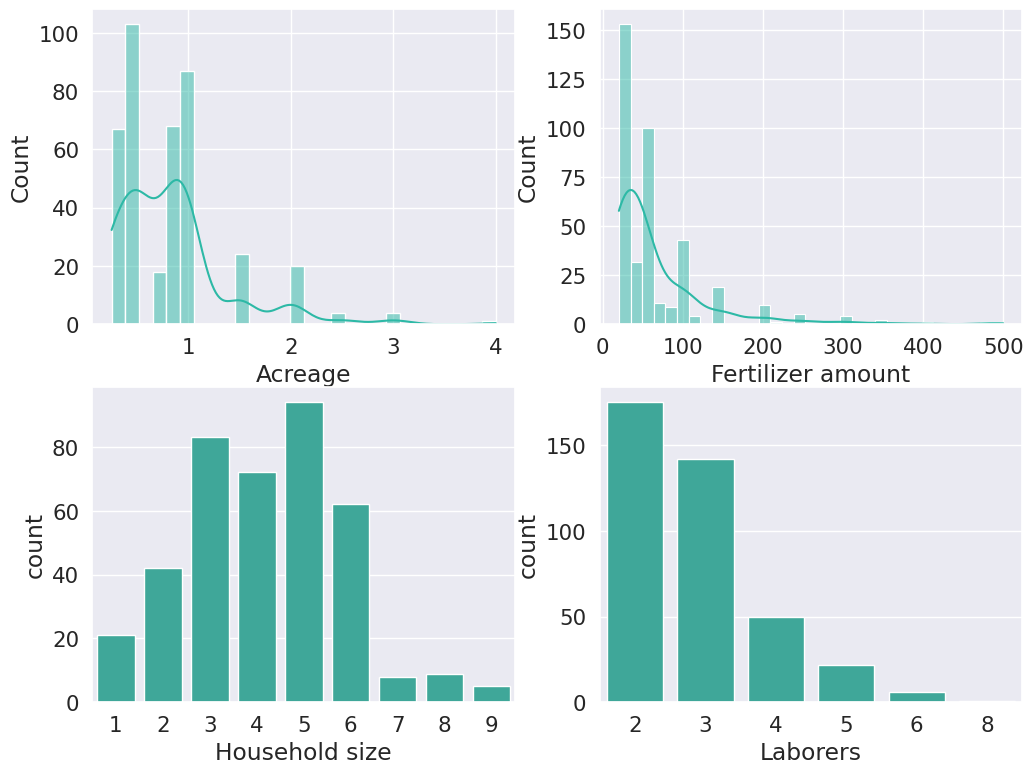

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

sns.histplot(data=df, x="Acreage", kde=True, color='#2DB9A6', ax=axs[0,0])
sns.histplot(data=df, x="Fertilizer amount", kde=True, color='#2DB9A6', ax=axs[0,1])
sns.countplot(df, x="Household size", color='#2DB9A6', ax=axs[1,0])
sns.countplot(df, x="Laborers", color='#2DB9A6', ax=axs[1,1])

* Feature Acreage memiliki distribusi positively skewed yang berada pada rentang acreage 0.0 - 1.0
* Feature Fertilizer amount memiliki distribusi positively skewed/miring kanan. Mayoritas petani menggunakan pupuk dalam jumlah kecil, umumnya tidak melebihi 100
* Mayoritas petani memiliki jumlah anggota keluarga normal yang tinggal serumah dengan median 4 anggota keluarga. Melansir dari `statista.com`, rerata jumlah anggota keluarga yang ada di Kenya berada pada 4 anggota keluarga per rumah.
* Mayoritas petani hanya memiliki 2 - 3 tenaga bantu.



In [ ]:
df.sort_values(by='Yield', ascending=False).head(10)

,Education,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
270,Secondary,Male,46-55,1,4.0,300,8,600,Savings,No,Radio,County Government,SMS text,Kiswahili
40,Primary,Female,18-35,9,1.0,50,3,600,Credit groups,No,Public gatherings,Private Provider,Phone Calls,Kiswahili
41,Primary,Female,18-35,2,0.5,40,3,560,Savings,No,Extension services,County Government,SMS text,Kiswahili
272,Secondary,Male,18-35,2,2.0,150,2,550,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
42,Primary,Female,18-35,5,2.0,50,2,550,Savings,No,Extension services,County Government,SMS text,English
271,Secondary,Female,18-35,5,2.0,150,2,550,Credit groups,No,Extension services,National Government,SMS text,Vernacular
46,Primary,Male,18-35,5,0.5,20,3,540,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
48,Primary,Female,18-35,4,1.0,50,3,540,Family,Yes,Radio,Private Provider,Phone Calls,Vernacular
43,Primary,Female,18-35,5,0.5,40,2,540,Credit groups,No,Extension services,Private Provider,Phone Calls,Kiswahili
44,Primary,Female,18-35,4,2.0,50,3,540,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili


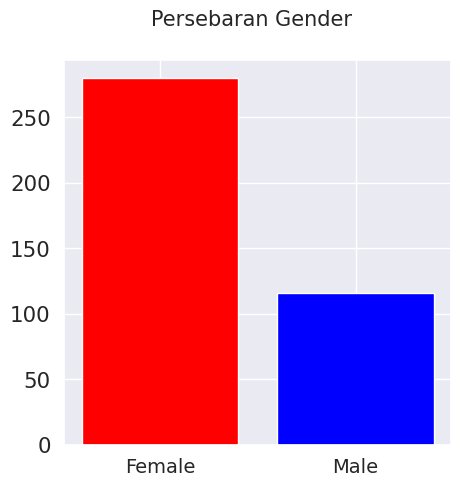

,count
Gender,
Female,280
Male,116


In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Persebaran Gender', fontsize=15)
ax.bar(df['Gender'].value_counts().index,
       df['Gender'].value_counts().values,
       color = ['red', 'blue'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Female','Male'], fontsize = 14)
plt.show()

display(pd.DataFrame(df['Gender'].value_counts()))

Petani perempuan lebih banyak 2x lipat dari petani laki-laki

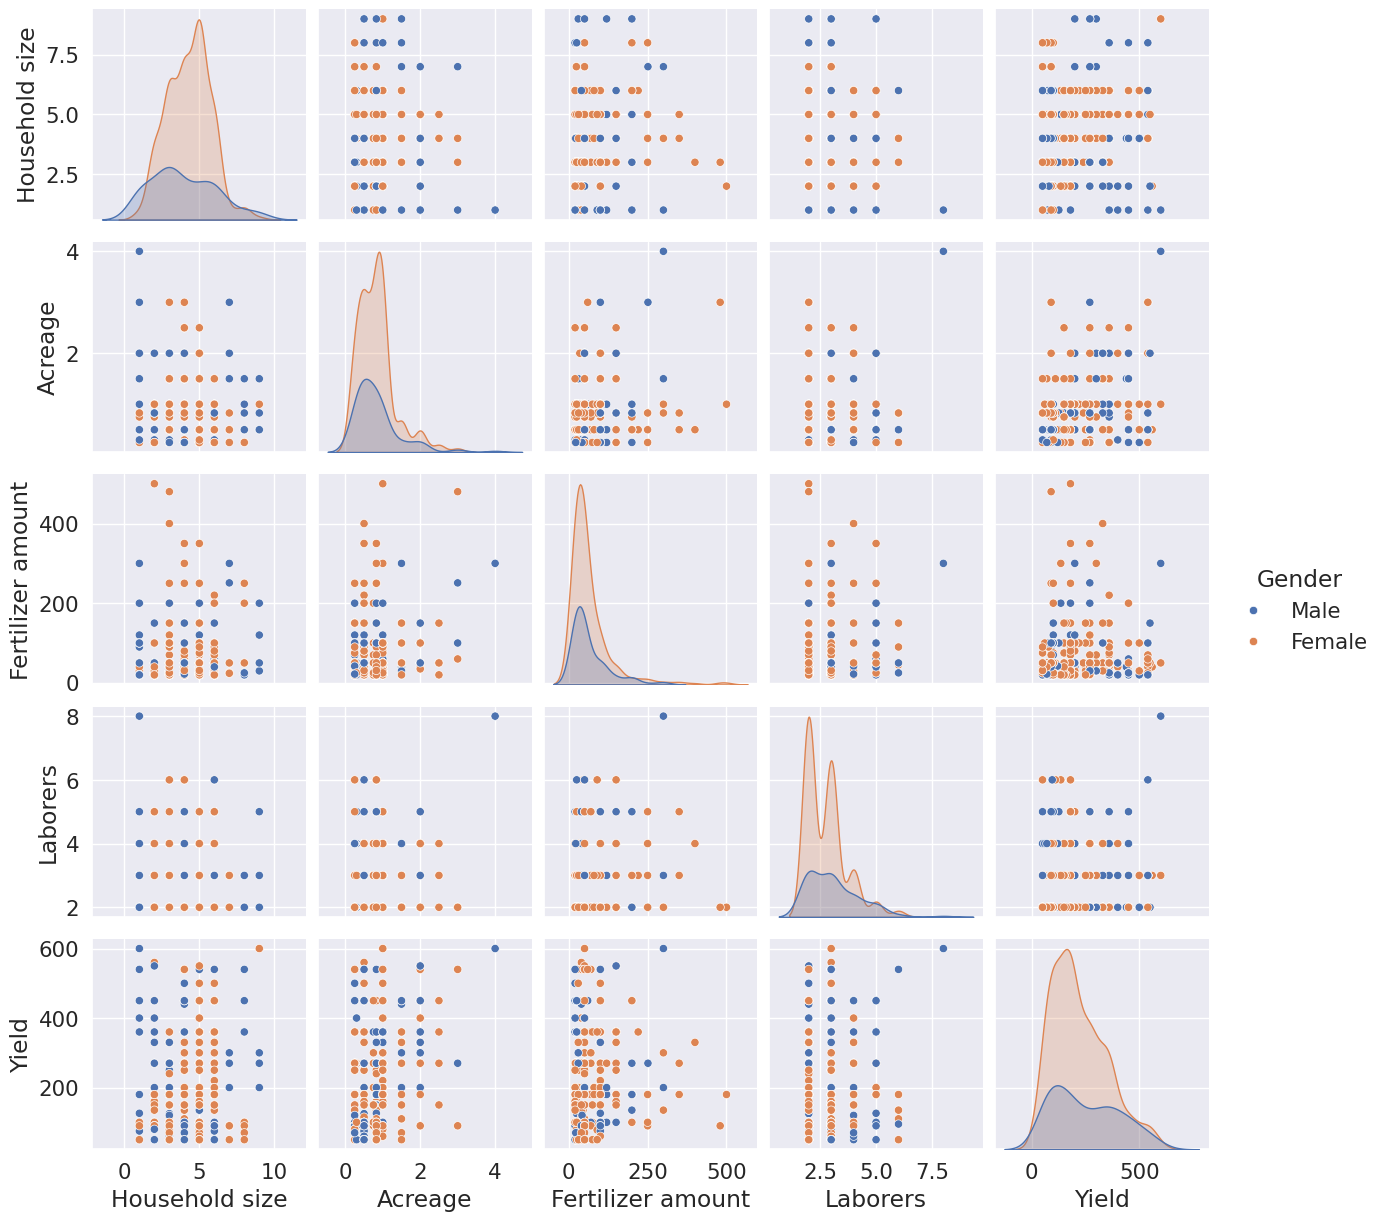

In [ ]:
sns.pairplot(df, hue = 'Gender')
plt.show()

* Perempuan memiliki andil yang lebih banyak dari laki-laki dalam pertanian
* Perempuan menghasilkan lebih banyak Yield daripada laki-laki

In [ ]:
df.groupby('Gender')['Yield'].mean()

Gender
Female    220.617857
Male      251.086207
Name: Yield, dtype: float64

Meskipun memiliki proporsi yang berbeda jauh, namun petani laki-laki memiliki efisiensi yang sedikit lebih tinggi dibandingkan dengan petani perempuan

In [ ]:
pd.DataFrame(df.groupby('Gender')['Age bracket'].value_counts())

count
Gender Age bracket       
Female 36-45           95
       46-55           81
       18-35           46
       56-65           42
       above 65        16
Male   18-35           37
       56-65           28
       36-45           25
       46-55           22
       above 65         4

Terdapat lebih banyak perempuan dibandingkan laki-laki dalam setiap kelompok usia.

In [ ]:
result = pd.DataFrame(df.groupby(['Gender', 'Age bracket'])['Yield'].mean(), columns=['Yield'])
result

Yield
Gender Age bracket            
Female 18-35        432.608696
       36-45        263.578947
       46-55        150.802469
       56-65         79.476190
       above 65      80.000000
Male   18-35        431.621622
       36-45        264.400000
       46-55        181.863636
       56-65         79.464286
       above 65      80.000000

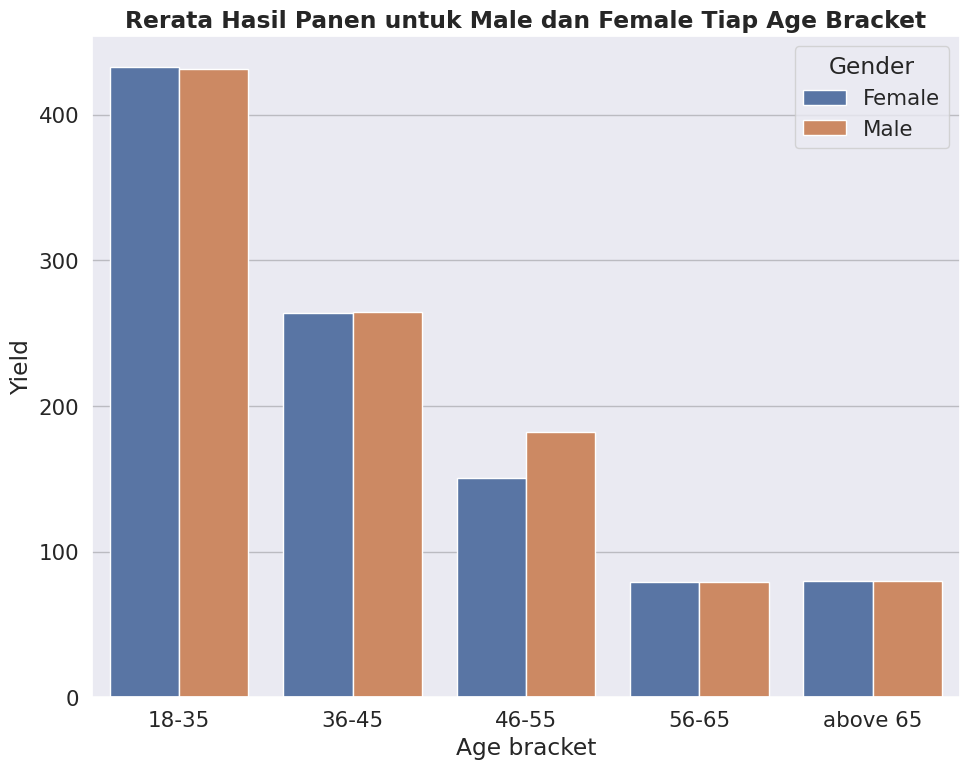

In [ ]:
result_reset = result.reset_index()

plt.figure(figsize = (10,8))

sns.barplot(x='Age bracket', y='Yield', hue='Gender', data=result_reset)
plt.title('Rerata Hasil Panen untuk Male dan Female Tiap Age Bracket', fontweight = 'bold')

plt.grid(True, axis = 'y', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

Perbedaan Yield antara laki-laki dan perempuan tidak signifikan bahkan memiliki kecenderungan nilai jumlah yang mendekati. Perbedaan baru terlihat pada kelompok usia 46-55.

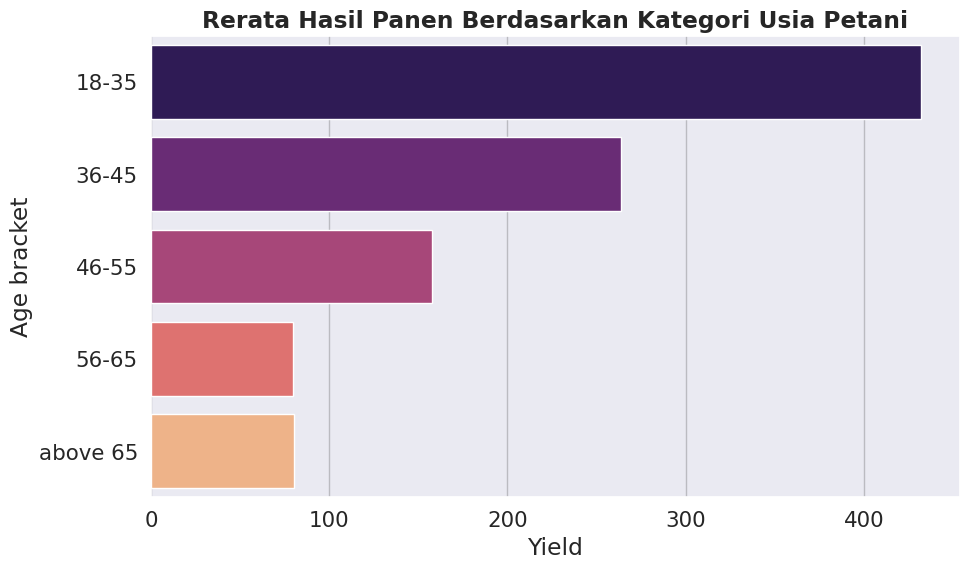

,count
Age bracket,
36-45,120
46-55,103
18-35,83
56-65,70
above 65,20


In [ ]:
age_yield = df.groupby('Age bracket')['Yield'].mean()

plt.figure(figsize = (10,6))
sns.barplot(y = age_yield.index, x = age_yield, palette='magma')
plt.title('Rerata Hasil Panen Berdasarkan Kategori Usia Petani', fontweight = 'bold')

plt.grid (True, axis = 'x', alpha = 0.2, color = 'black')
plt.tight_layout()
plt.show()

display(pd.DataFrame(df['Age bracket'].value_counts()))

Petani dengan rentang umur 18 - 35 merupakan yang paling produktif. Hal ini terjadi karena kondisi fisik yang masih dalam masa prima sehingga dapat melakukan pekerjaan pertanian lebih mudah dibandingkan dengan usia diatasnya. Selain itu, penerimaan teknologi dan informasi pertanian relatif lebih mudah ketika berada pada usia muda.

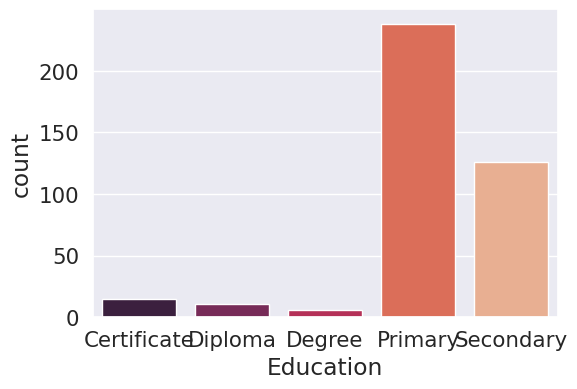

,count
Education,
Primary,238
Secondary,126
Certificate,15
Diploma,11
Degree,6


In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df,x='Education', palette='rocket')
plt.show()

display(pd.DataFrame(df['Education'].value_counts()))

<Axes: xlabel='Education', ylabel='Yield'>

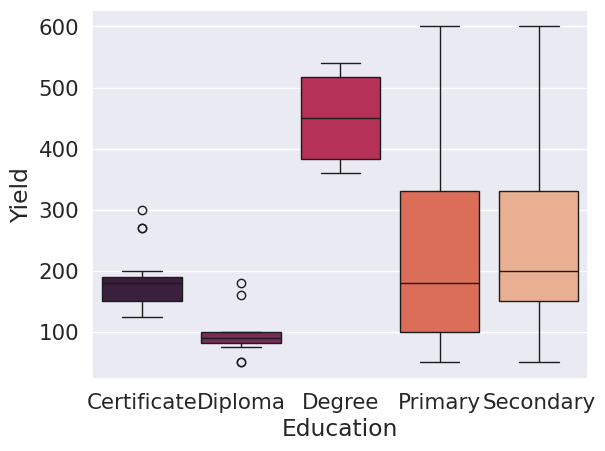

In [ ]:
sns.boxplot(x="Education", y="Yield", data=df, palette='rocket')

In [ ]:
df.groupby('Education').agg({'Acreage': 'sum', 'Yield':'mean'})

,Acreage,Yield
Education,,
Certificate,13.906125,187.666667
Degree,3.828063,450.000000
Diploma,6.812251,98.636364
Primary,189.856695,222.411765
Secondary,113.055128,248.928571


Tingkat pendidikan Primary dan Secondary memiliki range yield +-100 hingga 300, sedangkan petani dengan tingkat pendidikan Degree meskipun berjumlah lebih sedikit memiliki yield yang lebih tinggi, yaitu sekitar +-350 hingga 500. Hal ini mengindikasikan semakin tinggi tingkat pendidikan petani maka penyerapan informasi dan pemanfaatan teknologi untuk memaksimalkan hasil pertanian semakin tinggi.


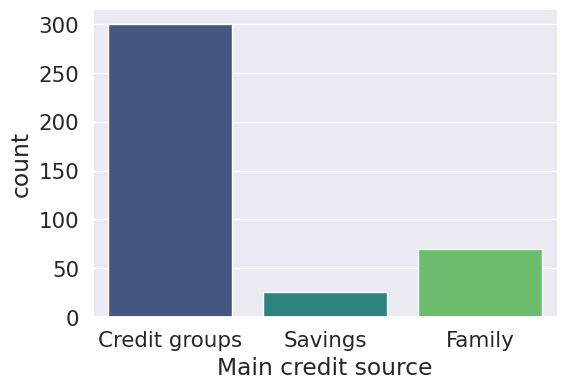

,count
Main credit source,
Credit groups,300
Family,70
Savings,26


In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df,x='Main credit source', palette='viridis')
plt.show()

display(pd.DataFrame(df['Main credit source'].value_counts()))

<Axes: xlabel='Main credit source', ylabel='Yield'>

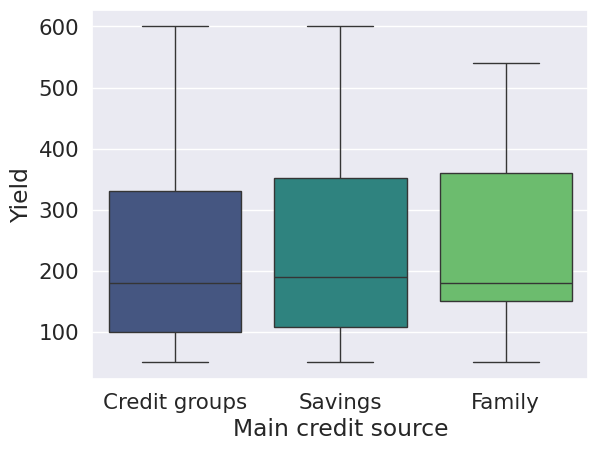

In [ ]:
sns.boxplot(x="Main credit source", y="Yield", data=df, palette='viridis')

Sumber utama kredit/pinjaman petani memiliki selisih yang tidak jauh berbeda dari satu sama lain

# Machine Learning

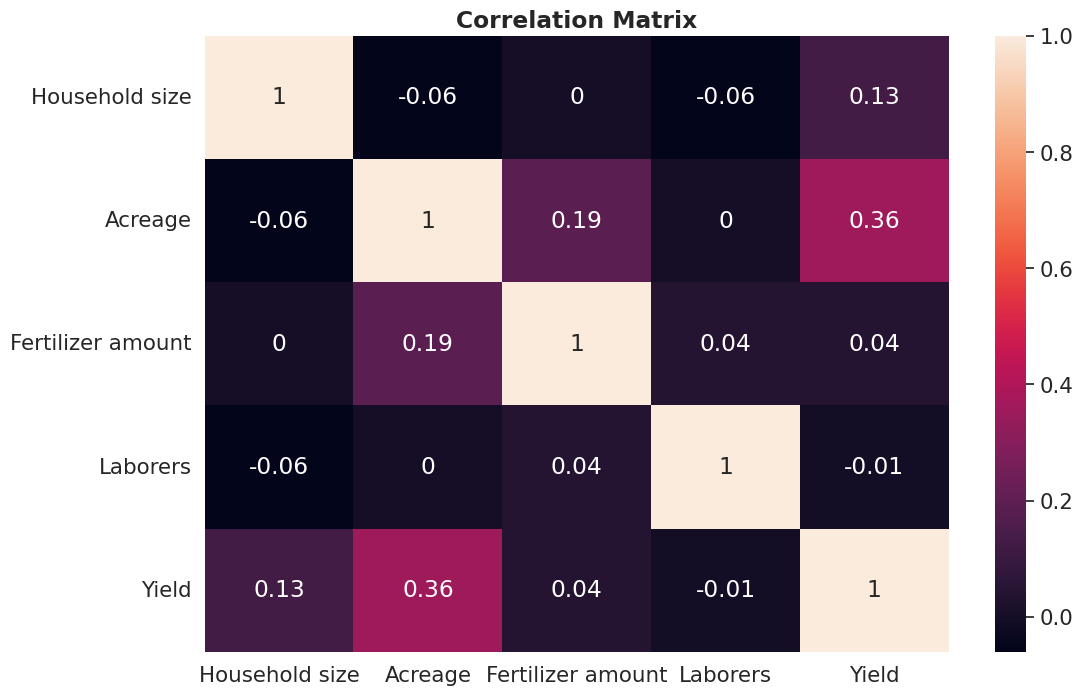

In [ ]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(corr.round(2), annot = True)
plt.title('Correlation Matrix', fontweight = 'bold')

plt.show()

In [ ]:
df.describe(include='object')

,Education,Gender,Age bracket,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
count,396,396,396,396,396,396,396,396,396
unique,5,2,5,3,2,5,4,2,3
top,Primary,Female,36-45,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
freq,238,280,120,300,284,178,228,271,299


In [ ]:
columns_to_encode = ['Education', 'Gender', 'Age bracket', 'Main credit source',
                     'Farm records', 'Main advisory source', 'Extension provider',
                     'Advisory format', 'Advisory language']

In [ ]:
label_encoder = preprocessing.LabelEncoder()
encoder = LabelEncoder()
df_encoded = df.copy()

for column in columns_to_encode:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

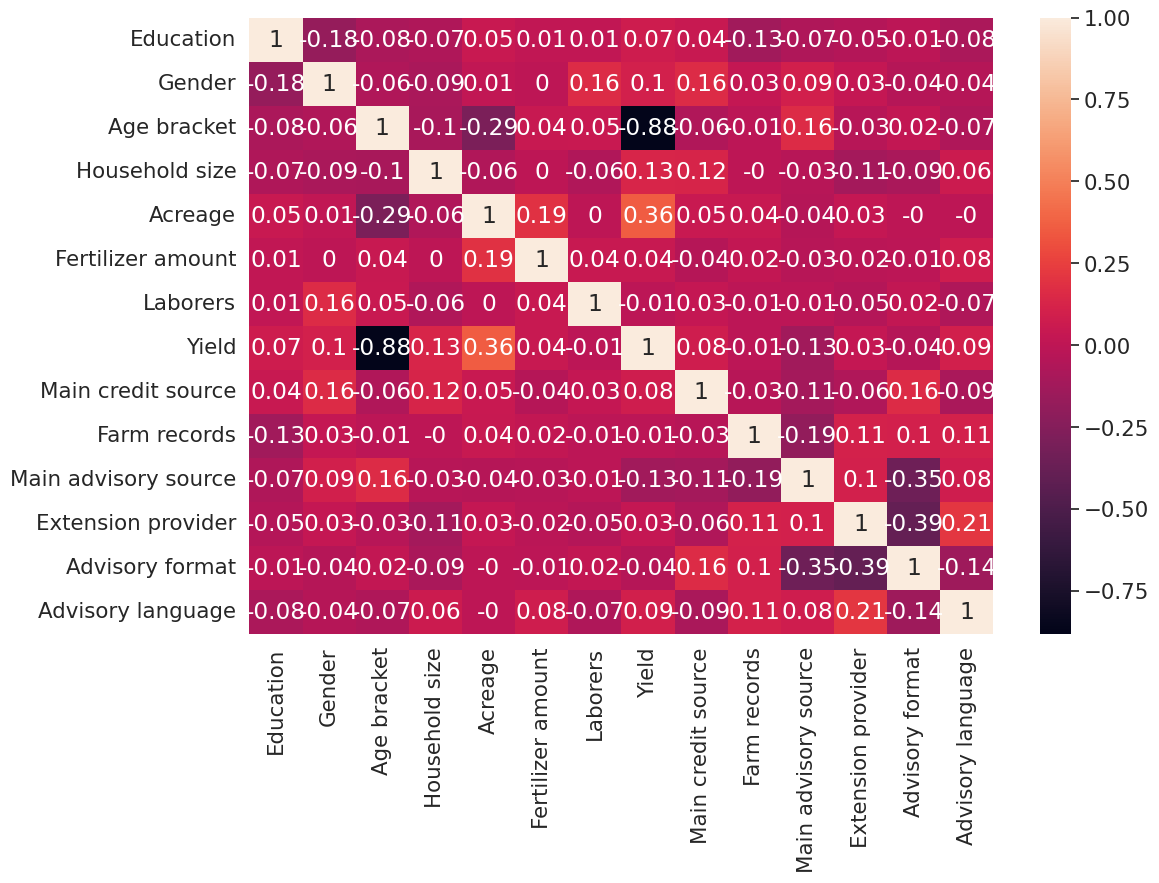

In [ ]:
corr_2  =df_encoded.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr_2.round(2), annot = True)

plt.show()

In [ ]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [ ]:
X = pd.get_dummies(X, columns=['Education', 'Gender', 'Age bracket',
                               'Main credit source', 'Farm records',
                               'Main advisory source', 'Extension provider',
                               'Advisory format', 'Advisory language'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

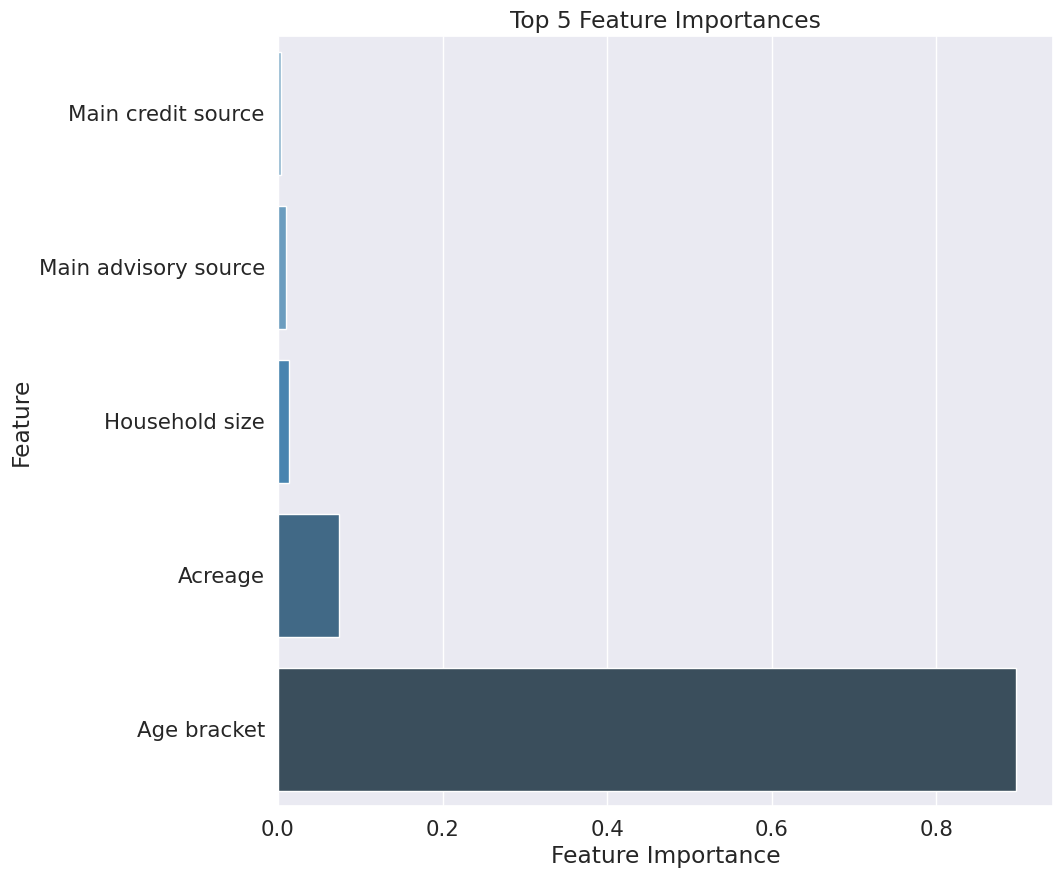

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_n = 5
sorted_feature_importances = feature_importances.sort_values()[-top_n:]
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, orient="h", palette="Blues_d")
plt.title("Top {} Feature Importances".format(top_n))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

Identifikasi 3 feature yang paling berpengaruh untuk Yield ialah Age bracket, Acreage, dan Household size.


---

* Usia menentukan kemampuan fisik untuk melakukan kegiatan pertanian. Yield yang dihasilkan akan semakin besar apabila lahan pertanian dikerjakan oleh petani usia produktif.
* Acreage merupakan luas lahan yang dipergunakan untuk pertanian, berdasarkan konsep matematis maka semakin luas lahan yang digunakan maka semakin banyak pula Yield yang dihasilkan.
* Household size tidak memiliki pengaruh sebesar usia maupun luas lahan, tetapi jumlah household size dapat menentukan jumlah tenaga tambahan yang dapat digunakan untuk membantu kegiatan pertanian.

In [ ]:
corr_2['Yield'].abs().sort_values(ascending = False).round(2)

Yield                   1.00
Age bracket             0.88
Acreage                 0.36
Household size          0.13
Main advisory source    0.13
Gender                  0.10
Advisory language       0.09
Main credit source      0.08
Education               0.07
Fertilizer amount       0.04
Advisory format         0.04
Extension provider      0.03
Laborers                0.01
Farm records            0.01
Name: Yield, dtype: float64

In [ ]:
FEATURES = ['Age bracket', 'Acreage', 'Main advisory source', 'Main credit source', 'Household size', 'Gender']
TARGET = ['Yield']

In [ ]:
X = df_encoded[FEATURES]
y = df_encoded['Yield']

forest = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, y_test).round(2)

0.85

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000,max_depth=5,random_state = 0)
rf.fit(X_train, y_train);

predictions = rf.predict(X_test)


errors = abs((predictions - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.23


In [ ]:
y_true = y_test
y_pred = predictions

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_true, y_pred))

Mean Absolute Error (MAE): 40.92590548823518
Mean Squared Error (MSE): 2807.6336563388613
Root Mean Squared Error (RMSE): 52.987108397598575
Mean Absolute Percentage Error (MAPE): 0.22929091567779264
Explained Variance Score: 0.849472037225983
Max Error: 135.69121919770657
Mean Squared Log Error: 0.07252755524102353
Median Absolute Error: 29.577506220550248
R^2: 0.8494161432442143
Mean Poisson Deviance: 11.270219830778812
Mean Gamma Deviance: 0.06699183660128419
